In [31]:
# import 
import numpy as np 
import qiskit 
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit_aer import AerSimulator

In [32]:
# generate a valid Deutch functio

def deutsch_function(x):
    """ Takes as input an integer between 1 and 4 in order to choose from one of the 
    possible deutsch functions"""

    if x not in [1,2,3,4]:
        raise ValueError('Input must be an integer between 1 and 4')

    circuit = QuantumCircuit(2)

    if (x == 2 or x ==  3):
        circuit.cx(0,1)
    if (x == 3 or x == 4 ):
        circuit.x(1)

    return circuit 

/Users/lorenzospera/Library/Python/3.9/lib/python/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


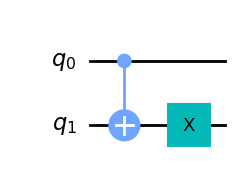

In [33]:
# display a specific circuit for a specific choice of the function
circuit_3 = deutsch_function(3)
display(circuit_3.draw("mpl"))

In [34]:
# define a function that implements the circuit 

def implement_circuit(function):
    """ Function that implements the circuit used in Deutsch alghorithm.
        The input of the function is a quantum circuit, in particular the 
        one we have defined above 
    """

    # build the required circuit 
    circuit_alghorithm = QuantumCircuit(2)              # we start with two qubits 

    # perform an Hadamard gate on both of the two qubits, first step of the alghorithm 
    circuit_alghorithm.h(0)
    circuit_alghorithm.h(1)
    circuit_alghorithm.barrier()

    # then we apply the unitary operation on the two qubits 
    circuit_alghorithm.compose(function, inplace = True)
    circuit_alghorithm.barrier()

    # measure the final state of the system, in particular the state of the top qubit is the one we are interested in 
    a = ClassicalRegister(1, "a")                           # classical bit to store the result  
    circuit_alghorithm.add_register(a)                      # add the register to the quantum circuit 
                    
    circuit_alghorithm.measure(0, a)                        # store the outcome of the measure in the classical bt

    return circuit_alghorithm

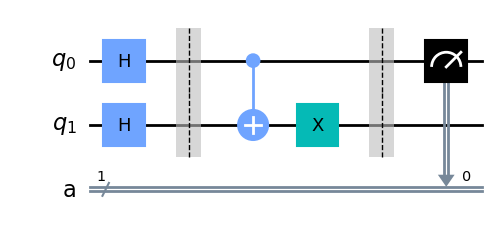

In [35]:
# we can now display the alghorithm using the fucntion we defined above 
circuit_alghorithm_3 = implement_circuit(circuit_3)
display(circuit_alghorithm_3.draw("mpl"))

In [36]:
# define a function that implements the alghorithm and outputs the the desired result 

def deutsch_algo(function):
    """ Function that takes as an input the circuit that implements the alghorithm 
    and outputs the desired result, if the function is balanced or constant"""
    
    circuit_test = implement_circuit(function)

    result = AerSimulator().run(circuit_test, shots = 1, memory = True).result()
    output = result.get_memory()

    if output[0] == 0:
        return "f is constant "
    else:
        return "f is balanced "
    


In [38]:
# implement the alghorithm for the function defined above 
result = deutsch_algo(circuit_3)
print(result)


f is balanced 
